<a href="https://colab.research.google.com/github/sauravkumar19/NETFLIX-MOVIES-AND-TV-SHOWS-CLUSTERING/blob/main/NETFLIX_MOVIES_AND_TV_SHOWS_CLUSTERING.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Problem Statement**

This dataset consists of tv shows and movies available on Netflix as of 2019. The dataset is collected from Flixable which is a third-party Netflix search engine.

In 2018, they released an interesting report which shows that the number of TV shows on Netflix has nearly tripled since 2010. The streaming service’s number of movies has decreased by more than 2,000 titles since 2010, while its number of TV shows has nearly tripled. It will be interesting to explore what all other insights can be obtained from the same dataset.

Integrating this dataset with other external datasets such as IMDB ratings, rotten tomatoes can also provide many interesting findings.

## <b>In this  project, you are required to do </b>
1. Exploratory Data Analysis 

2. Understanding what type content is available in different countries

3. Is Netflix has increasingly focusing on TV rather than movies in recent years.
4. Clustering similar content by matching text-based features



# **Attribute Information**

1. show_id : Unique ID for every Movie / Tv Show

2. type : Identifier - A Movie or TV Show

3. title : Title of the Movie / Tv Show

4. director : Director of the Movie

5. cast : Actors involved in the movie / show

6. country : Country where the movie / show was produced

7. date_added : Date it was added on Netflix

8. release_year : Actual Releaseyear of the movie / show

9. rating : TV Rating of the movie / show

10. duration : Total Duration - in minutes or number of seasons

11. listed_in : Genere

12. description: The Summary description

In [1]:
import numpy as np
import scipy
import pandas as pd
import math
import random
import sklearn
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from scipy.sparse.linalg import svds
import matplotlib.pyplot as plt

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
path = '/content/drive/MyDrive/AlmaBetter_Capstone_projects/capstone_project4/Copy of NETFLIX MOVIES AND TV SHOWS CLUSTERING.csv'
df = pd.read_csv(path)

In [4]:
netflix_data = df.copy()

In [5]:
netflix_data.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [6]:
netflix_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


In [7]:
netflix_data.describe(include = 'all')

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
count,7787,7787,7787,5398,7069,7280,7777,7787.000000,7780,7787,7787,7787
unique,7787,2,7787,4049,6831,681,1565,NaN,14,216,492,7769
top,s1,Movie,3%,"Raúl Campos, Jan Suter",David Attenborough,United States,"January 1, 2020",NaN,TV-MA,1 Season,Documentaries,Multiple women report their husbands as missin...
freq,1,5377,1,18,18,2555,118,NaN,2863,1608,334,3
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013.932580,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.757395,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1925.000000,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013.000000,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017.000000,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018.000000,NaN,NaN,NaN,NaN


In [8]:
def remove_nan_value(df,th = 80.0):
  
  null_percentage = df.isnull().sum()/len(df)
  print(null_percentage)
  print('*'*50)

  #step1
  #preserving columns having at least 20% of not null values
  df.dropna(axis=1,inplace=True,thresh=((th/100.0)*df.shape[0]))
  #preserving rows having at least 20% of not null values
  df.dropna(axis=0,inplace=True,thresh=((th/100.0)*df.shape[1]))

  null_percentage = df.isnull().sum()/len(df)
  print(null_percentage)
  print('*'*50)

  #step2
  duplicates = len(df[df.duplicated()])
  print('Duplicate value present in data is', duplicates)
  df.drop_duplicates(inplace=True,ignore_index=True)

  numeric_column = df.describe().columns
  cateogorical_column = df.describe(include = 'object').columns

  for item in null_percentage.iteritems():
    if (item[0] in cateogorical_column) and (item[1] != 0):
      frequency = df[item[0]].value_counts().sort_values(ascending = False)
      if frequency[0]/len(df) > 0.3:
        df[item[0]].fillna(frequency.index[0], inplace = True)
      else:
        df[item[0]].fillna('other',inplace = True)

    if (item[0] in numeric_column) and (item[1] != 0):
      df[item[0]].fillna(df[item[0]].mean(), inplace = True)

  null_percentage = df.isnull().sum()/len(df)
  print(null_percentage)  

In [9]:
remove_nan_value(netflix_data)

show_id         0.000000
type            0.000000
title           0.000000
director        0.306793
cast            0.092205
country         0.065109
date_added      0.001284
release_year    0.000000
rating          0.000899
duration        0.000000
listed_in       0.000000
description     0.000000
dtype: float64
**************************************************
show_id         0.000000
type            0.000000
title           0.000000
cast            0.092205
country         0.065109
date_added      0.001284
release_year    0.000000
rating          0.000899
duration        0.000000
listed_in       0.000000
description     0.000000
dtype: float64
**************************************************
Duplicate value present in data is 0
show_id         0.0
type            0.0
title           0.0
cast            0.0
country         0.0
date_added      0.0
release_year    0.0
rating          0.0
duration        0.0
listed_in       0.0
description     0.0
dtype: float64


## EDA

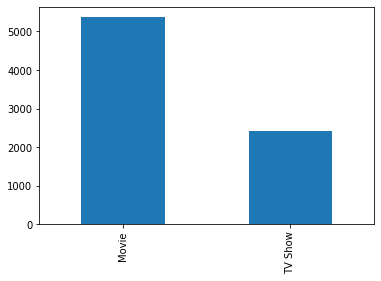

In [10]:
netflix_data['type'].value_counts().plot(kind = 'bar')

In [11]:
shows_movie = netflix_data.groupby('release_year')['type'].value_counts().unstack()
shows_movie.fillna(0,inplace = True)
shows_movie

type,Movie,TV Show
release_year,,
1925,0.0,1.0
1942,2.0,0.0
1943,3.0,0.0
1944,3.0,0.0
1945,3.0,0.0
...,...,...
2017,744.0,268.0
2018,734.0,387.0
2019,582.0,414.0


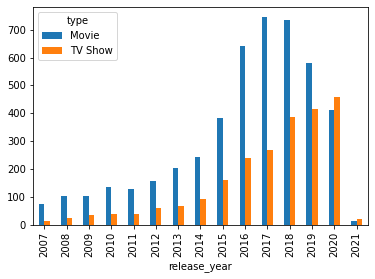

In [12]:
shows_movie.tail(15).plot(kind = 'bar')

In [13]:
movie_rate = netflix_data.groupby('rating')['type'].value_counts().unstack()
movie_rate.fillna(0,inplace = True)
movie_rate

type,Movie,TV Show
rating,,
G,39.0,0.0
NC-17,3.0,0.0
NR,79.0,5.0
PG,247.0,0.0
PG-13,386.0,0.0
R,663.0,2.0
TV-14,1272.0,659.0
TV-G,111.0,83.0
TV-MA,1850.0,1020.0


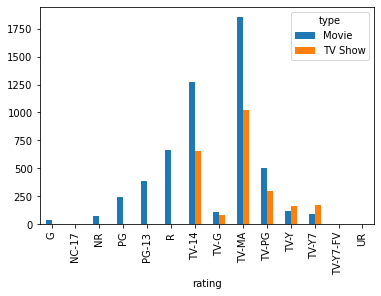

In [14]:
movie_rate.plot(kind = 'bar')

In [15]:
netflix_data['month'] = netflix_data['date_added'].apply(lambda x: x.split()[0])
netflix_data['min and season'] = netflix_data['duration'].apply(lambda x: x.split()[0])

In [16]:
netflix_data.head()

,show_id,type,title,cast,country,date_added,release_year,rating,duration,listed_in,description,month,min and season
0,s1,TV Show,3%,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,August,4
1,s2,Movie,7:19,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,December,93
2,s3,Movie,23:59,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",December,78
3,s4,Movie,9,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...",November,80
4,s5,Movie,21,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...,January,123


In [17]:
features = ['type','cast','country','rating','listed_in','month','min and season']
cast_table = netflix_data[features]
cast_table.head()

,type,cast,country,rating,listed_in,month,min and season
0,TV Show,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,TV-MA,"International TV Shows, TV Dramas, TV Sci-Fi &...",August,4
1,Movie,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,TV-MA,"Dramas, International Movies",December,93
2,Movie,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,R,"Horror Movies, International Movies",December,78
3,Movie,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,PG-13,"Action & Adventure, Independent Movies, Sci-Fi...",November,80
4,Movie,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,PG-13,Dramas,January,123


In [18]:
for i in ['cast','listed_in', 'country']:
  cast_table[i] = cast_table[i].apply(lambda x: x.split(','))
  cast_table = cast_table.explode(i)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [19]:
cast_table.head()

,type,cast,country,rating,listed_in,month,min and season
0,TV Show,João Miguel,Brazil,TV-MA,International TV Shows,August,4
0,TV Show,João Miguel,Brazil,TV-MA,TV Dramas,August,4
0,TV Show,João Miguel,Brazil,TV-MA,TV Sci-Fi & Fantasy,August,4
0,TV Show,Bianca Comparato,Brazil,TV-MA,International TV Shows,August,4
0,TV Show,Bianca Comparato,Brazil,TV-MA,TV Dramas,August,4


In [20]:
cast_table.shape

(162353, 7)

In [21]:
cast_table['listed_in'] = cast_table['listed_in'].apply(lambda x: x.split('&'))
cast_table = cast_table.explode('listed_in')

In [22]:
cast_table['listed_in'] = cast_table['listed_in'].apply(lambda x: x.split()[0] if x.split()[0] != 'TV' else x.split()[1])

In [23]:
cast_table.index = range(0,len(cast_table))
cast_table.head()

,type,cast,country,rating,listed_in,month,min and season
0,TV Show,João Miguel,Brazil,TV-MA,International,August,4
1,TV Show,João Miguel,Brazil,TV-MA,Dramas,August,4
2,TV Show,João Miguel,Brazil,TV-MA,Sci-Fi,August,4
3,TV Show,João Miguel,Brazil,TV-MA,Fantasy,August,4
4,TV Show,Bianca Comparato,Brazil,TV-MA,International,August,4


In [24]:
blank_index = cast_table[cast_table['country'] == ''].index

In [25]:
cast_table = cast_table.drop(blank_index)
  

In [26]:
cast_table.head()

,type,cast,country,rating,listed_in,month,min and season
0,TV Show,João Miguel,Brazil,TV-MA,International,August,4
1,TV Show,João Miguel,Brazil,TV-MA,Dramas,August,4
2,TV Show,João Miguel,Brazil,TV-MA,Sci-Fi,August,4
3,TV Show,João Miguel,Brazil,TV-MA,Fantasy,August,4
4,TV Show,Bianca Comparato,Brazil,TV-MA,International,August,4


In [27]:
def remove_unwanted_space(string):
  if string[0] == ' ':
    return string[1:]
  elif string[-1] == ' ':
    return string[:-1]
  else:
    return string

In [28]:
for i in ['cast','listed_in', 'country']:
  cast_table[i] = cast_table[i].apply(lambda x : x[1:] if x[0] == ' ' else x)

In [29]:
def genre_wise_eda(df,column1,column2):
  column1_genre = df.groupby(column1)[column2].value_counts()
  column1_unique = df[column1].unique()

  column1_genre_dict = {}
  for items in column1_unique:
    column1_tuple = column1_genre[items].to_dict()
    column1_genre_dict[items] = column1_tuple

  column1_genre = pd.Series(column1_genre_dict)
  column1_genre.index.name = column1
  column1_genre.name = 'genre'

  column1_total_genre = df.groupby(column1)[column2].size()

  t2 = pd.merge(column1_genre,column1_total_genre, how ='inner',on =column1).sort_values(by = column2,ascending = False).head(10)
  


  if t2.index[0] == 'other':
    t2[1:].plot(kind = 'bar', figsize = (10,7))
    for iter,row in t2['genre'][1:].iteritems():
      series = pd.Series(row)
      series.index.name = iter
      fig = plt.figure(figsize = (10,7))
      ax = fig.gca()
      series.plot(kind = 'bar',ax = ax)

  else:
    t2.plot(kind = 'bar', figsize = (10,7))
    for iter,row in t2['genre'].iteritems():
      series = pd.Series(row)
      series.index.name = iter
      fig = plt.figure(figsize = (10,7))
      ax = fig.gca()
      series.plot(kind = 'bar',ax = ax)

  return t2

,genre,listed_in
cast,,
other,"{'Documentaries': 515, 'International': 355, '...",1751
Anupam Kher,"{'International': 40, 'Dramas': 29, 'Comedies'...",144
Shah Rukh Khan,"{'International': 35, 'Dramas': 30, 'Comedies'...",127
David Attenborough,"{'Docuseries': 26, 'British': 24, 'Nature': 17...",109
Om Puri,"{'International': 28, 'Dramas': 23, 'Comedies'...",104
John Cleese,"{'Comedies': 28, 'Children': 19, 'Family': 19,...",103
Akshay Kumar,"{'International': 28, 'Dramas': 16, 'Comedies'...",101
Boman Irani,"{'International': 27, 'Comedies': 16, 'Dramas'...",101
Naseeruddin Shah,"{'Dramas': 27, 'International': 27, 'Comedies'...",99


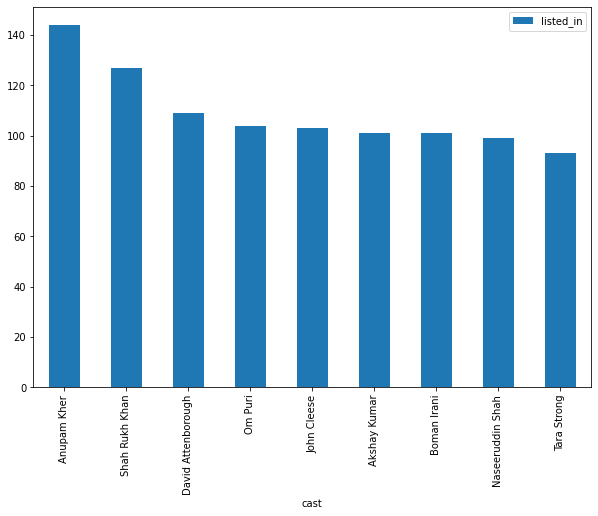

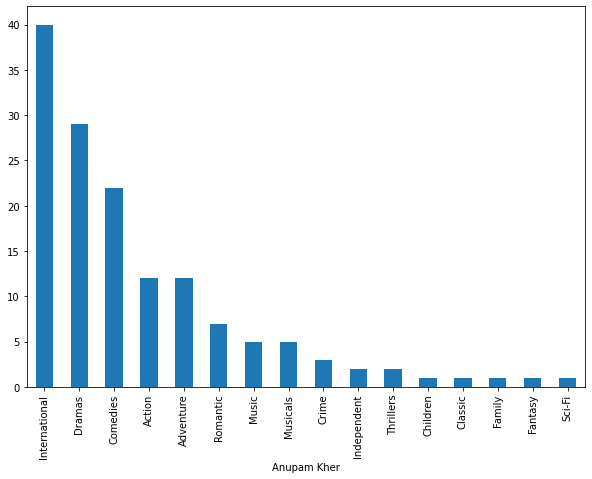

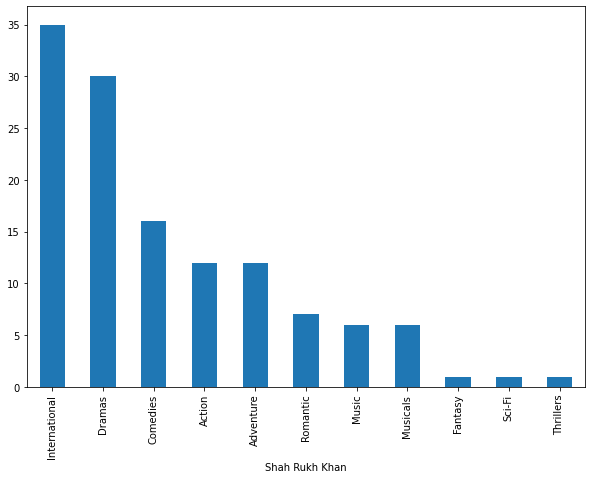

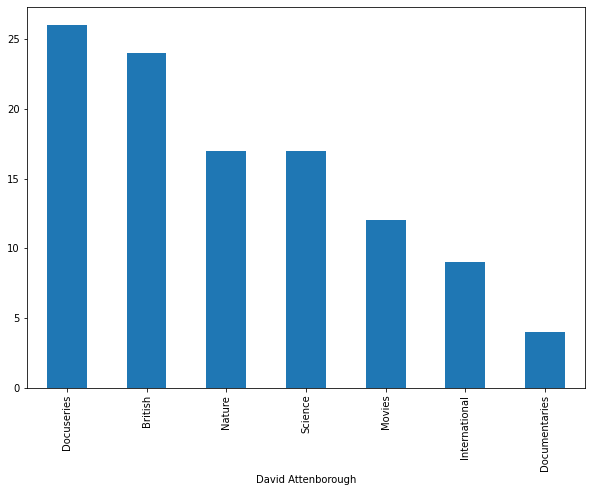

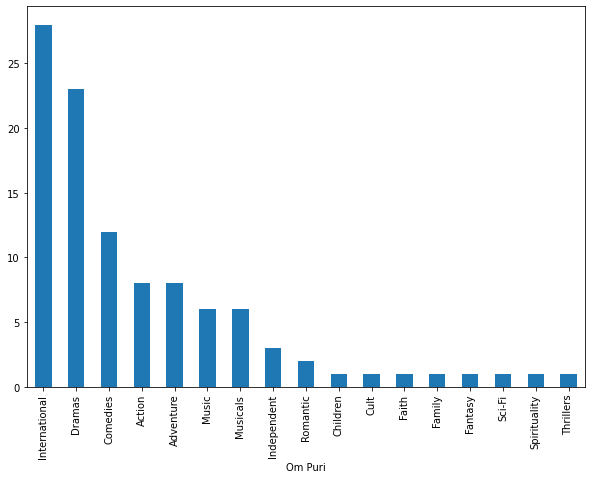

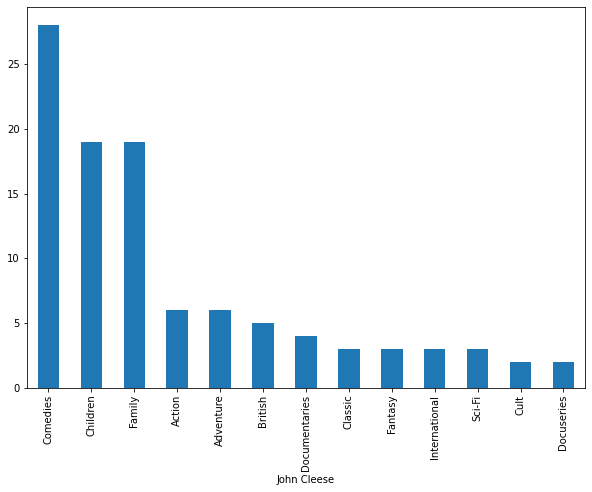

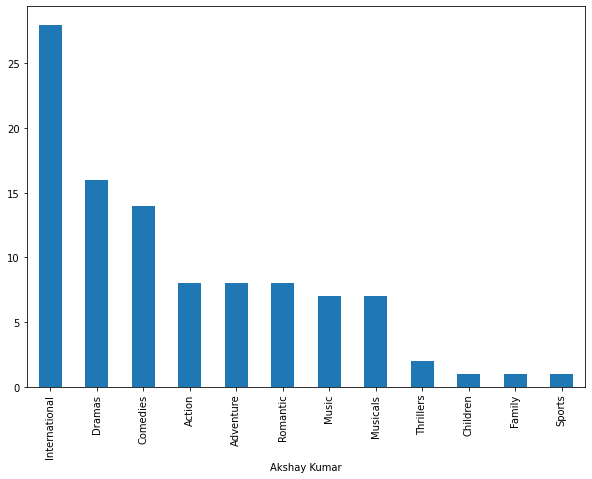

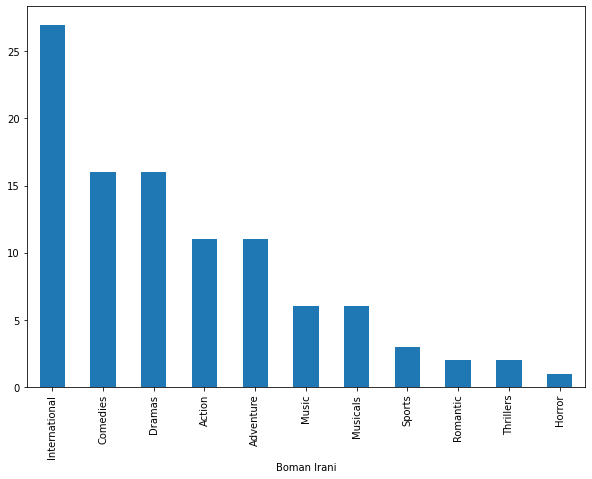

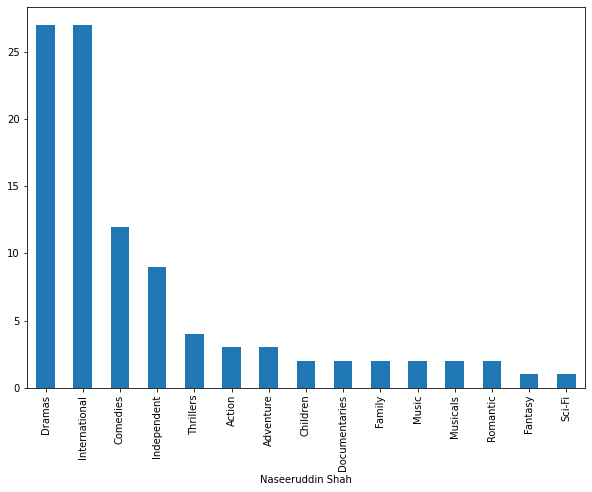

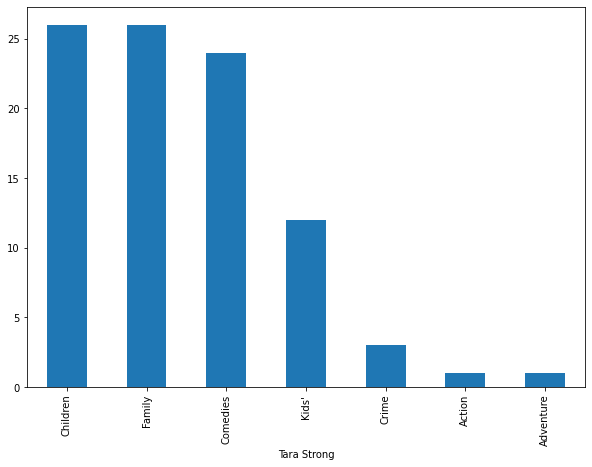

In [30]:
genre_wise_eda(cast_table,'cast','listed_in')

,genre,listed_in
country,,
United States,"{'Dramas': 9923, 'Comedies': 8686, 'Action': 4...",64923
India,"{'International': 6675, 'Dramas': 5119, 'Comed...",22373
United Kingdom,"{'Dramas': 1896, 'International': 1741, 'Briti...",12742
Canada,"{'Comedies': 991, 'Dramas': 952, 'Children': 6...",7955
Japan,"{'International': 2183, 'Anime': 2161, 'Action...",7897
France,"{'International': 1809, 'Dramas': 1576, 'Comed...",7227
Spain,"{'International': 1534, 'Dramas': 764, 'Spanis...",5002
South Korea,"{'International': 1335, 'Korean': 938, 'Romant...",4841
Germany,"{'International': 842, 'Dramas': 815, 'Comedie...",4107


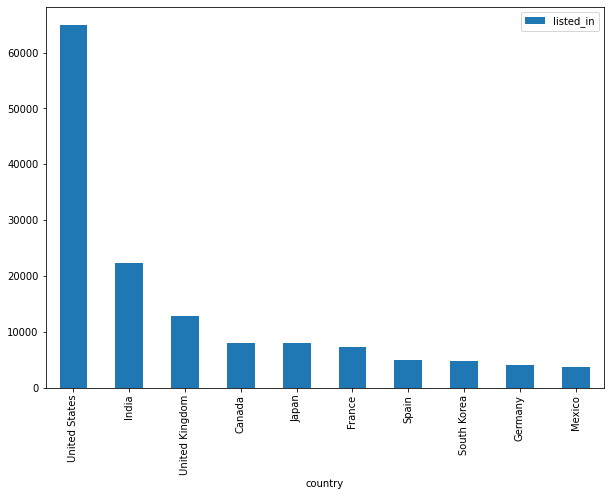

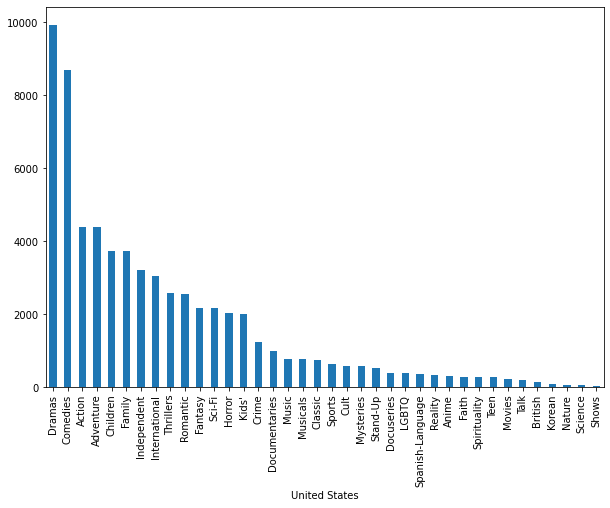

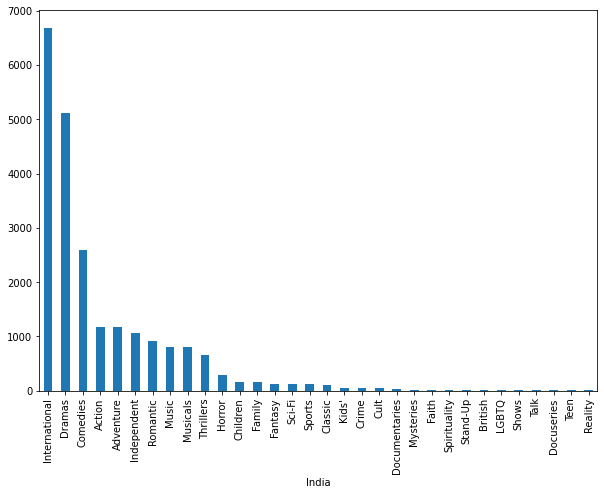

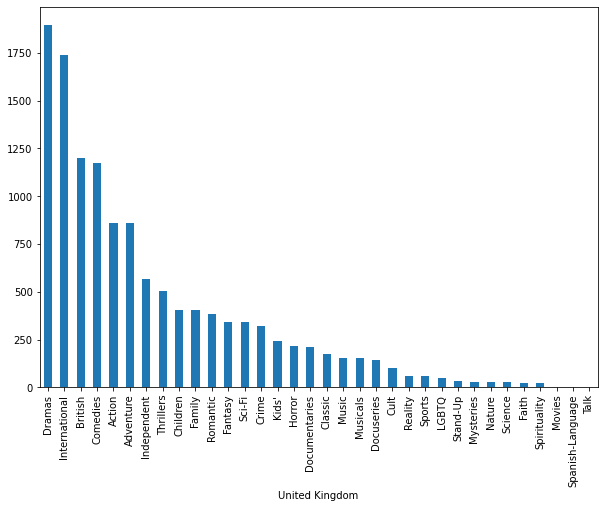

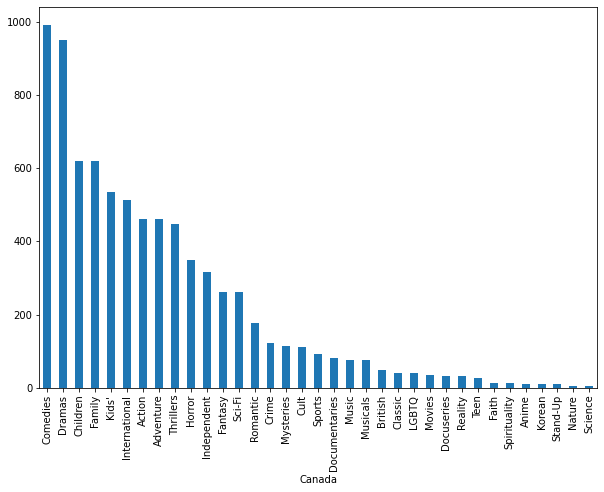

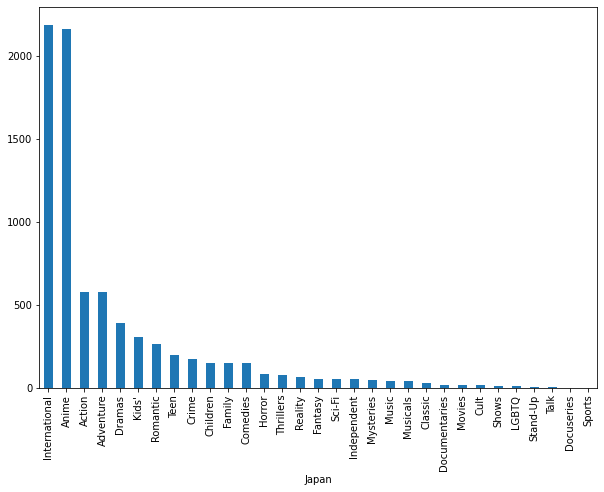

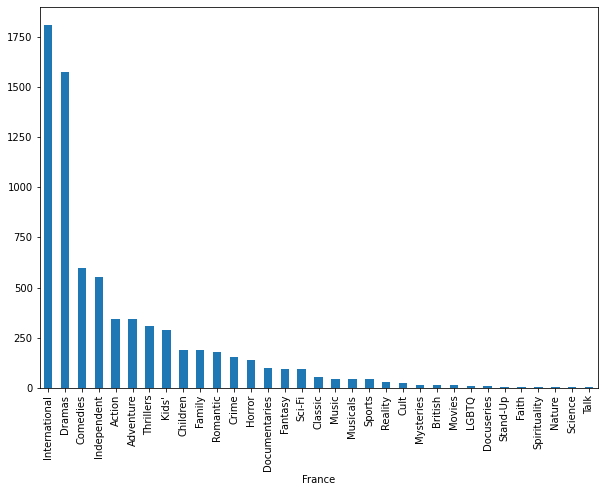

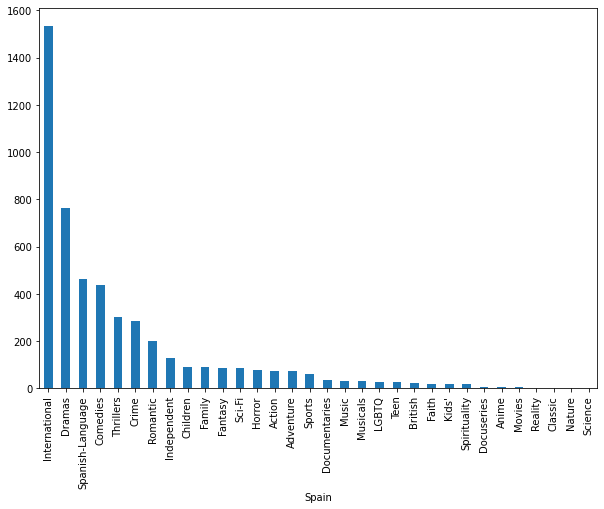

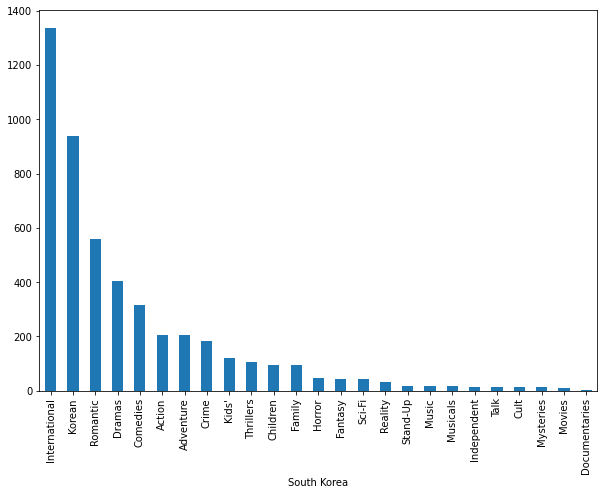

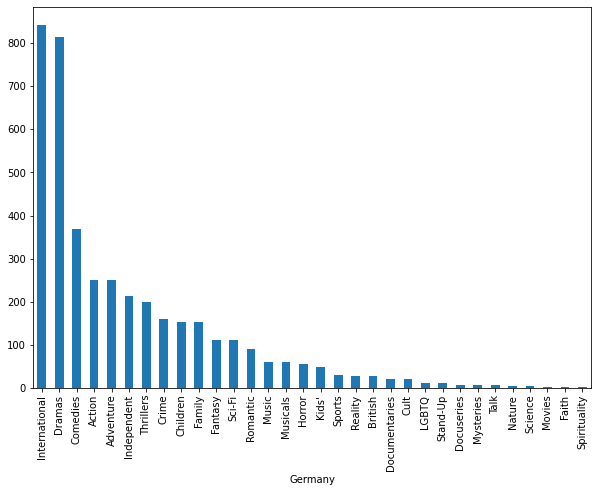

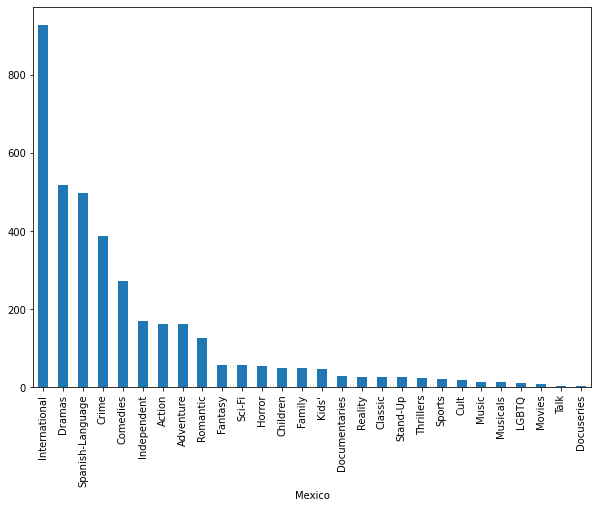

In [31]:
genre_wise_eda(cast_table,'country','listed_in')

In [32]:
cast_table.head()

,type,cast,country,rating,listed_in,month,min and season
0,TV Show,João Miguel,Brazil,TV-MA,International,August,4
1,TV Show,João Miguel,Brazil,TV-MA,Dramas,August,4
2,TV Show,João Miguel,Brazil,TV-MA,Sci-Fi,August,4
3,TV Show,João Miguel,Brazil,TV-MA,Fantasy,August,4
4,TV Show,Bianca Comparato,Brazil,TV-MA,International,August,4


,genre,rating
cast,,
other,"{'TV-MA': 700, 'TV-14': 431, 'TV-PG': 295, 'TV...",1751
Anupam Kher,"{'TV-14': 97, 'TV-PG': 24, 'TV-MA': 15, 'R': 5...",144
Shah Rukh Khan,"{'TV-14': 101, 'TV-PG': 16, 'TV-MA': 6, 'R': 4}",127
David Attenborough,"{'TV-PG': 86, 'TV-G': 17, 'TV-14': 4, 'PG': 2}",109
Om Puri,"{'TV-14': 45, 'TV-PG': 30, 'TV-MA': 17, 'PG': ...",104
John Cleese,"{'PG': 48, 'TV-MA': 20, 'PG-13': 11, 'TV-Y7': ...",103
Akshay Kumar,"{'TV-14': 57, 'TV-PG': 35, 'TV-MA': 4, 'PG-13'...",101
Boman Irani,"{'TV-14': 65, 'TV-MA': 22, 'TV-PG': 11, 'PG-13...",101
Naseeruddin Shah,"{'TV-14': 56, 'TV-MA': 27, 'TV-PG': 9, 'TV-G':...",99


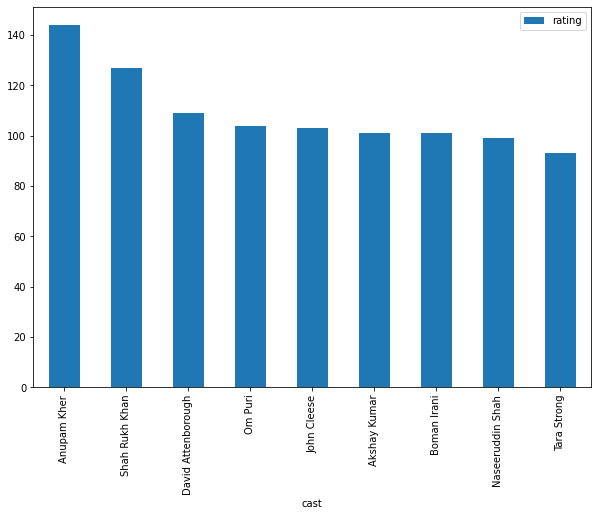

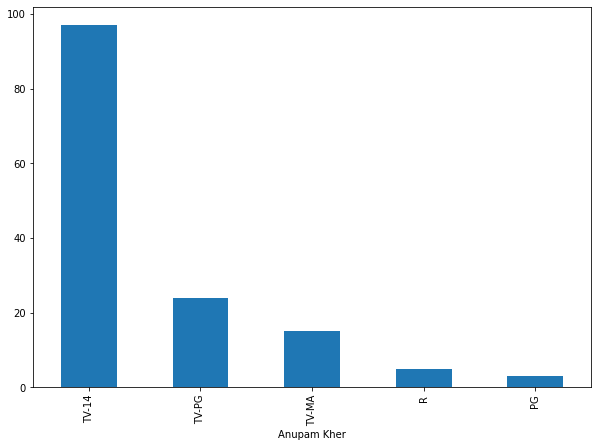

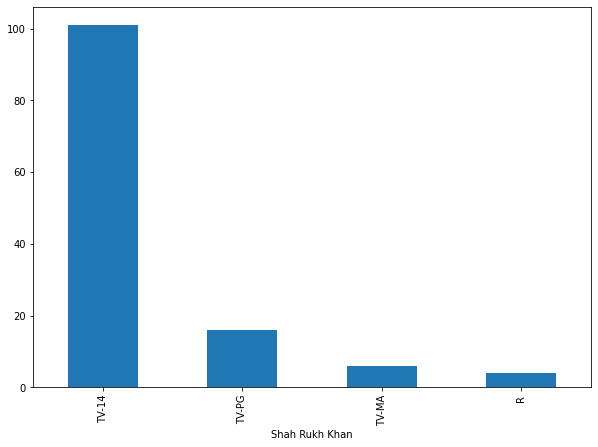

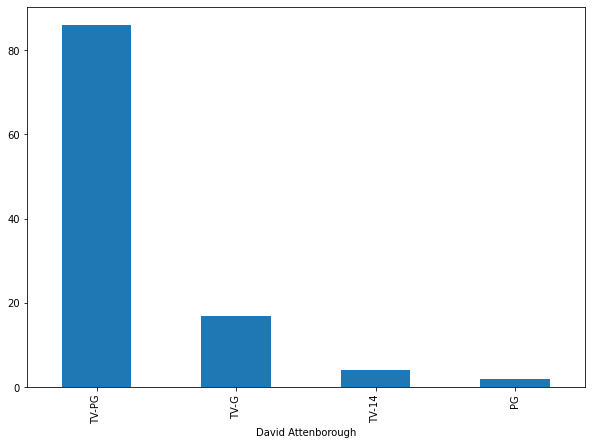

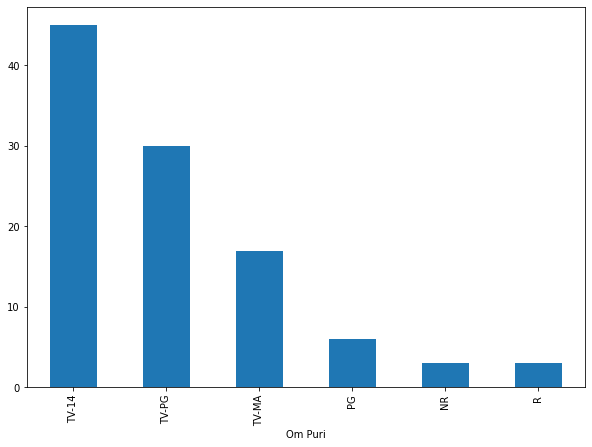

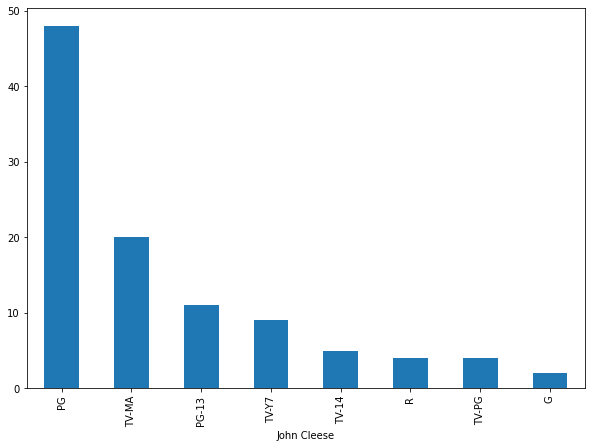

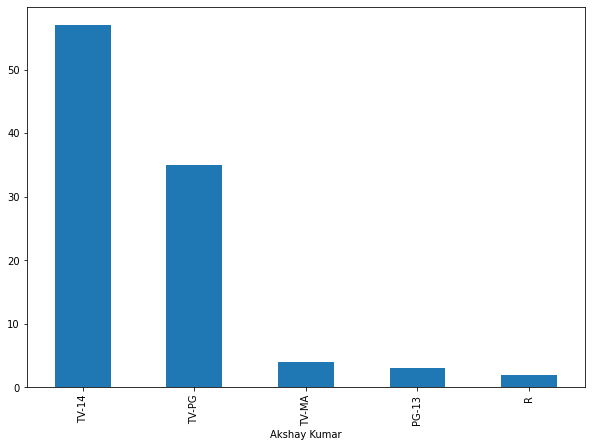

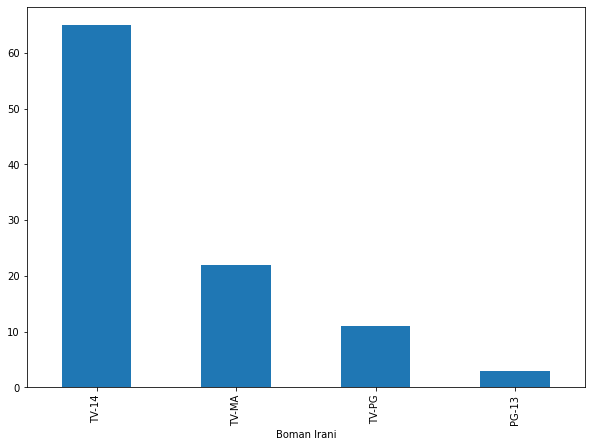

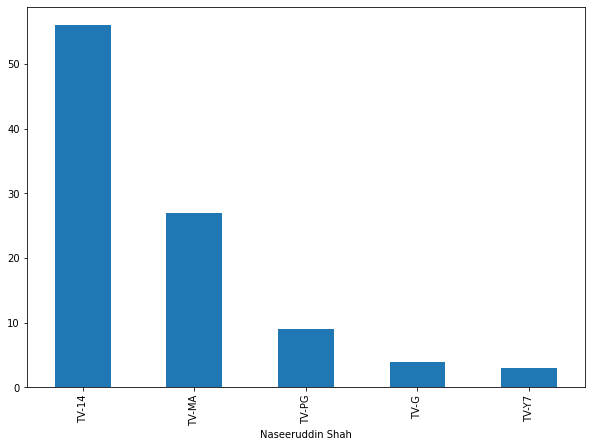

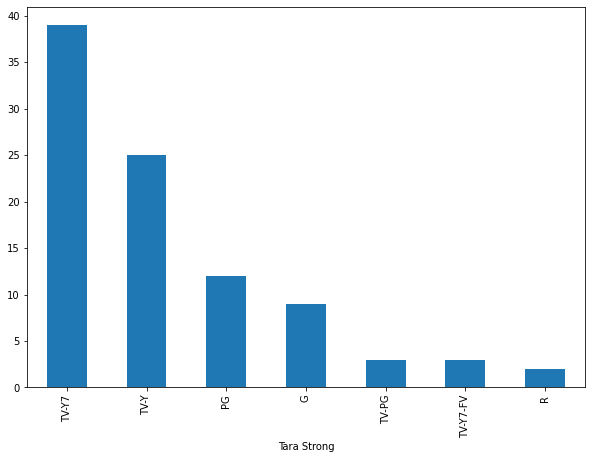

In [33]:
genre_wise_eda(cast_table,'cast','rating')

,genre,type
country,,
United States,"{'Movie': 46893, 'TV Show': 18030}",64923
India,"{'Movie': 21368, 'TV Show': 1005}",22373
United Kingdom,"{'Movie': 8603, 'TV Show': 4139}",12742
Canada,"{'Movie': 5586, 'TV Show': 2369}",7955
Japan,"{'TV Show': 4732, 'Movie': 3165}",7897
France,"{'Movie': 5717, 'TV Show': 1510}",7227
Spain,"{'Movie': 3218, 'TV Show': 1784}",5002
South Korea,"{'TV Show': 3418, 'Movie': 1423}",4841
Germany,"{'Movie': 3209, 'TV Show': 898}",4107


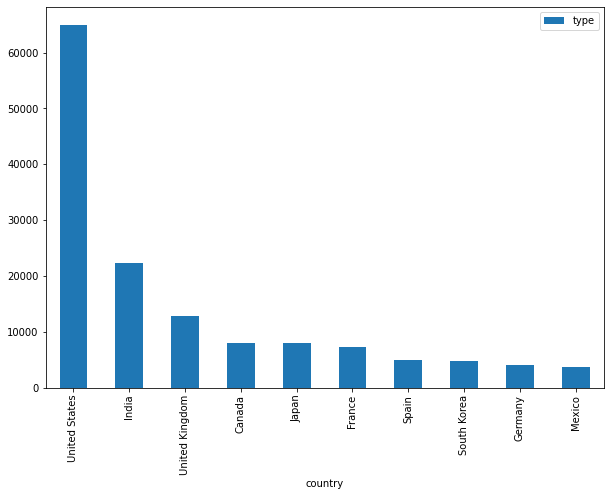

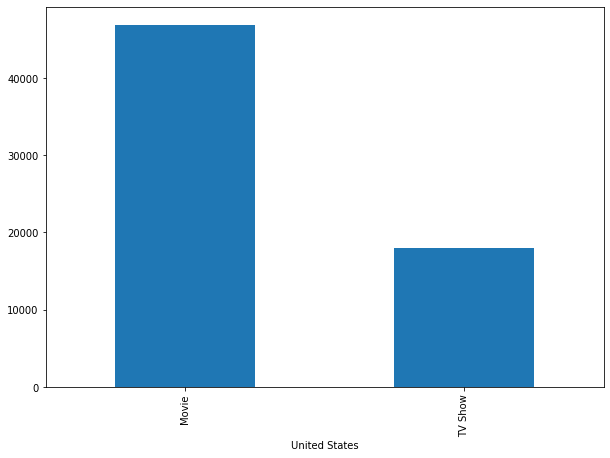

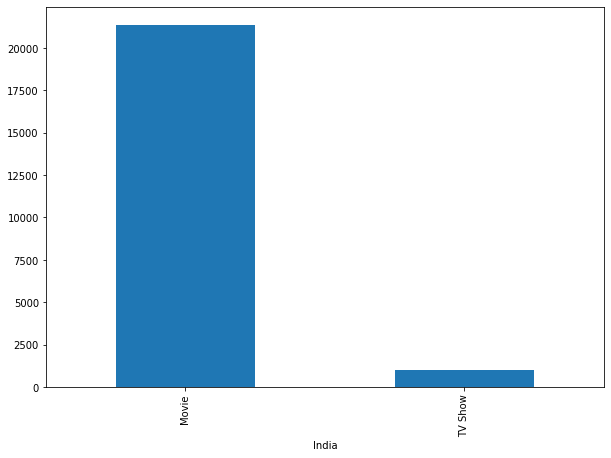

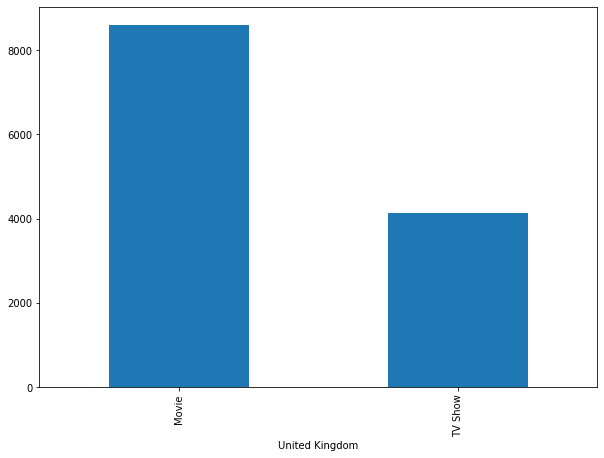

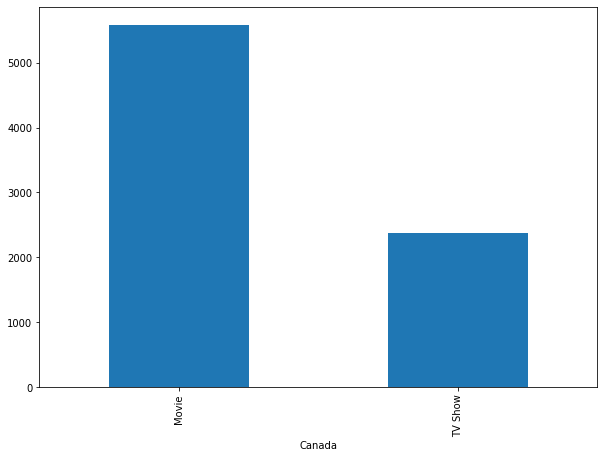

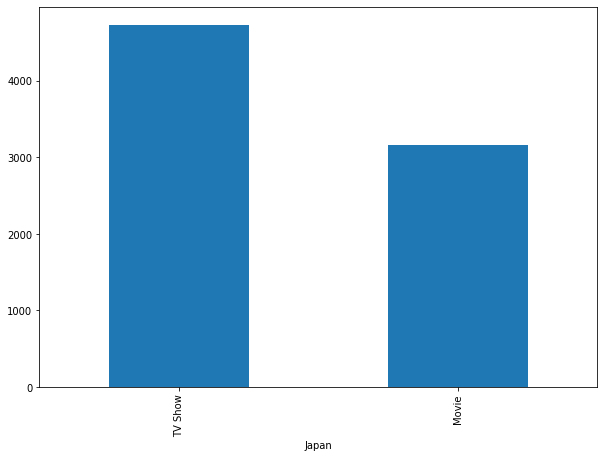

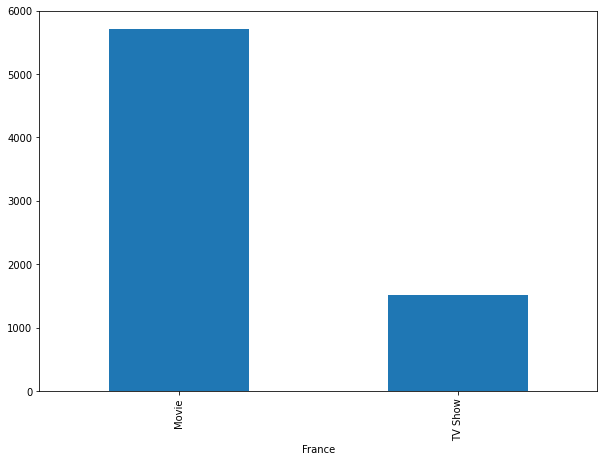

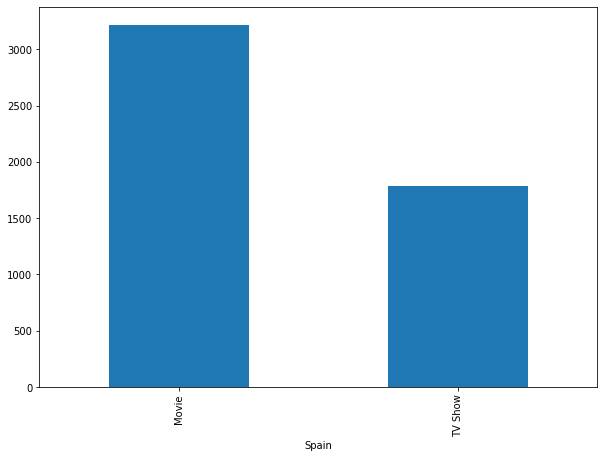

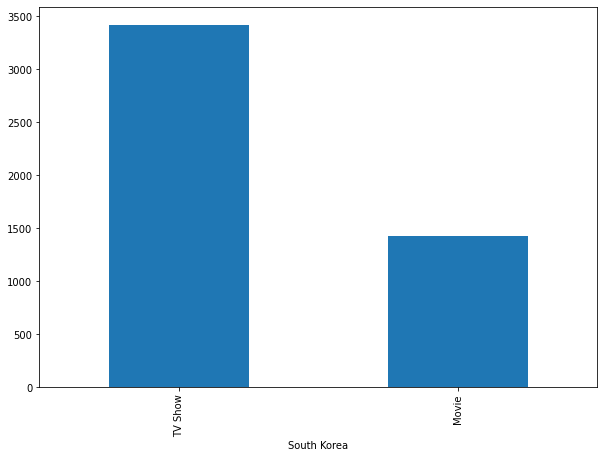

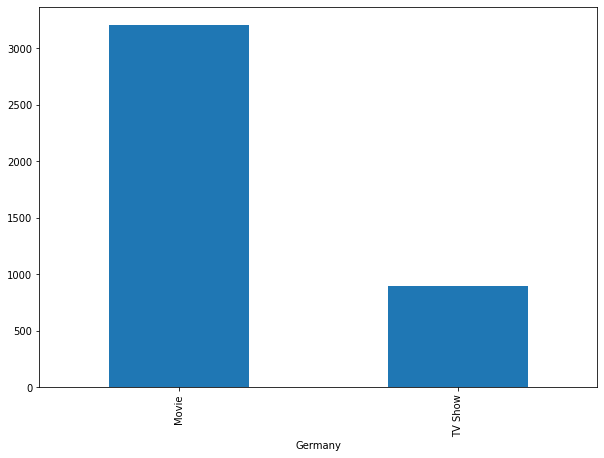

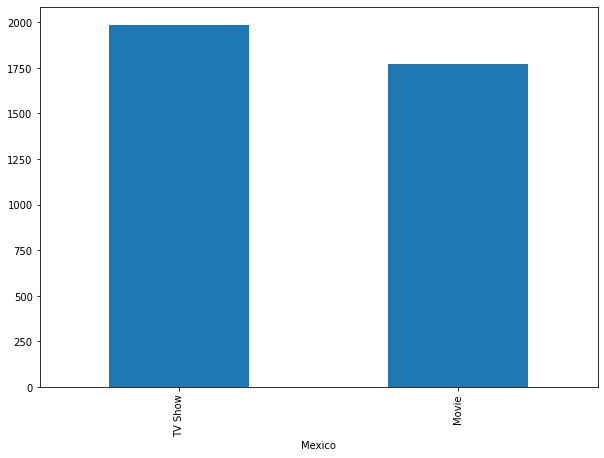

In [34]:
genre_wise_eda(cast_table,'country','type')

,genre,rating
country,,
United States,"{'TV-MA': 16598, 'R': 11640, 'PG-13': 9084, 'T...",64923
India,"{'TV-14': 12706, 'TV-MA': 5177, 'TV-PG': 3388,...",22373
United Kingdom,"{'TV-MA': 4115, 'R': 3048, 'PG-13': 1795, 'PG'...",12742
Canada,"{'TV-MA': 1781, 'R': 1442, 'TV-14': 903, 'PG-1...",7955
Japan,"{'TV-MA': 3017, 'TV-14': 2293, 'TV-PG': 1229, ...",7897
France,"{'TV-MA': 3511, 'R': 1246, 'TV-14': 631, 'PG-1...",7227
Spain,"{'TV-MA': 3931, 'TV-14': 286, 'R': 225, 'PG': ...",5002
South Korea,"{'TV-MA': 2063, 'TV-14': 1730, 'TV-PG': 382, '...",4841
Germany,"{'TV-MA': 1604, 'R': 849, 'PG-13': 613, 'TV-14...",4107


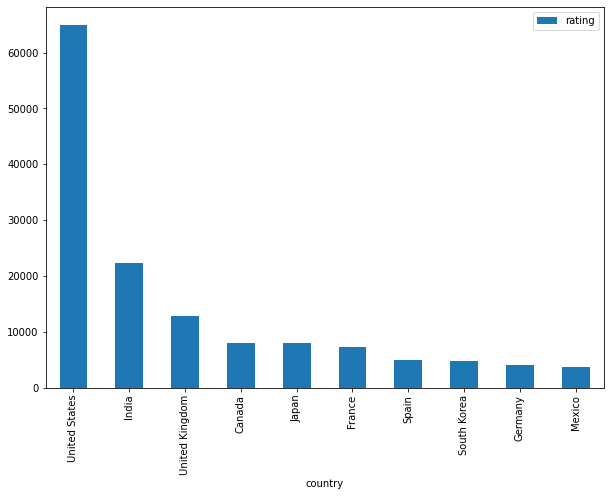

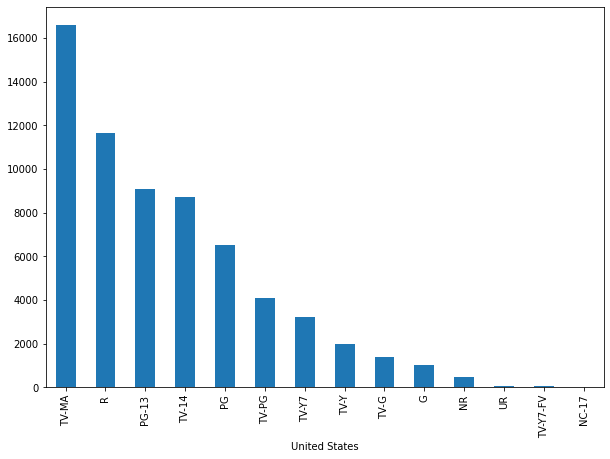

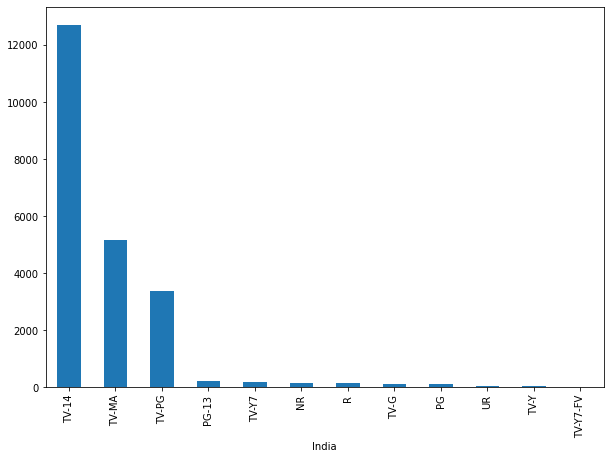

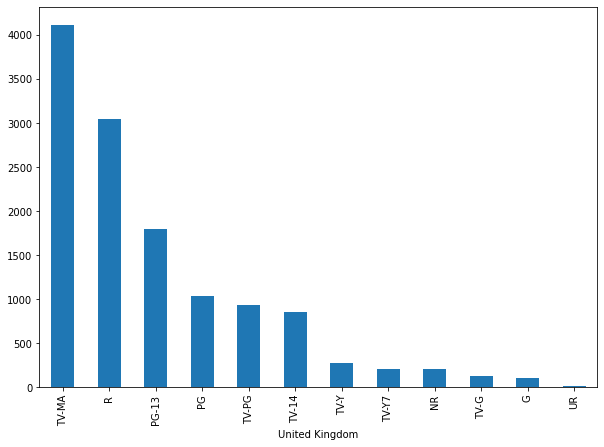

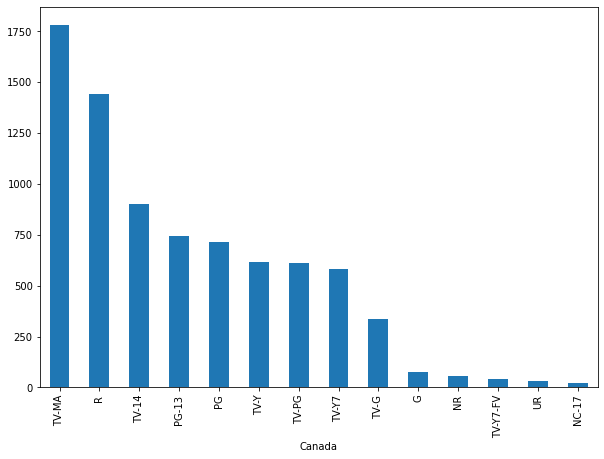

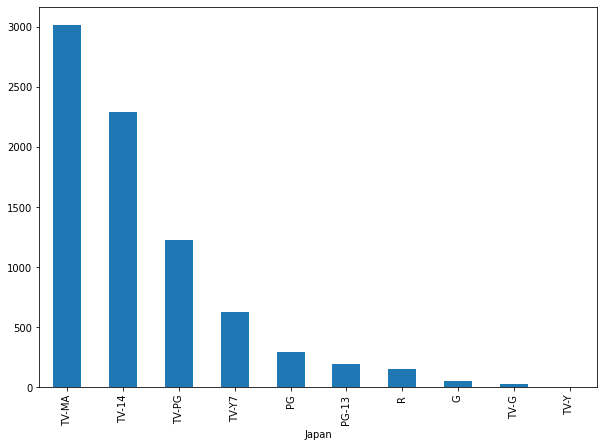

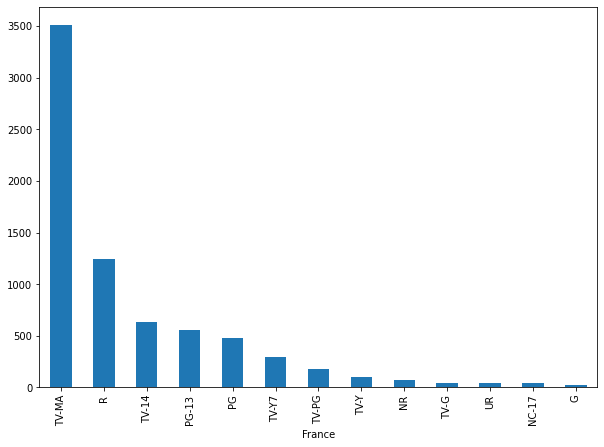

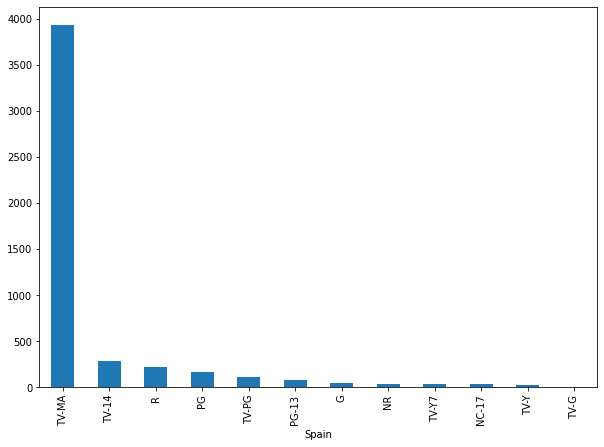

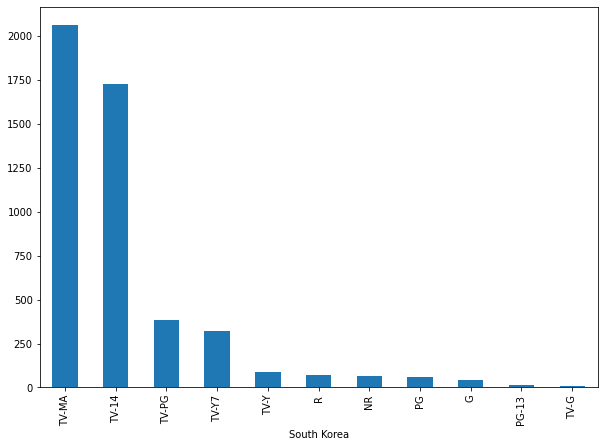

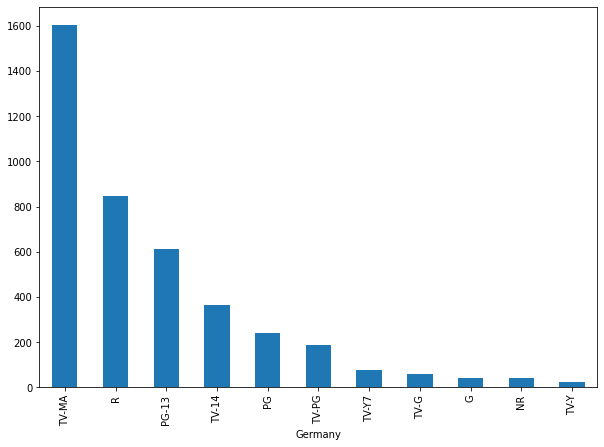

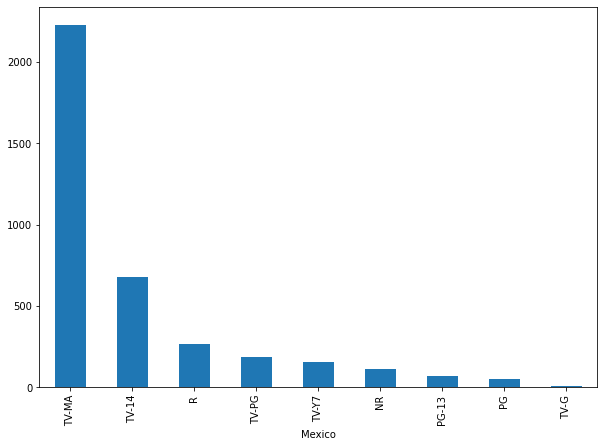

In [35]:
genre_wise_eda(cast_table,'country','rating')

In [36]:
netflix_data.head()

,show_id,type,title,cast,country,date_added,release_year,rating,duration,listed_in,description,month,min and season
0,s1,TV Show,3%,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,August,4
1,s2,Movie,7:19,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,December,93
2,s3,Movie,23:59,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",December,78
3,s4,Movie,9,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...",November,80
4,s5,Movie,21,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...,January,123


In [37]:
a = netflix_data['description'][0]
a

'In a future where the elite inhabit an island paradise far from the crowded slums, you get one chance to join the 3% saved from squalor.'

In [38]:
# import re
# def text_preprocessing(text):

  